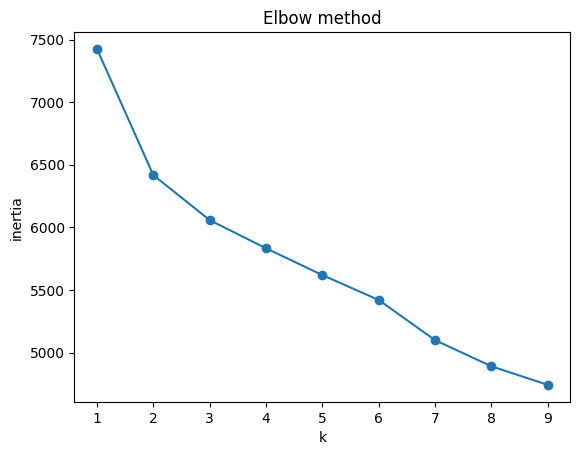

ARI vs labels: 0.4380786213733765


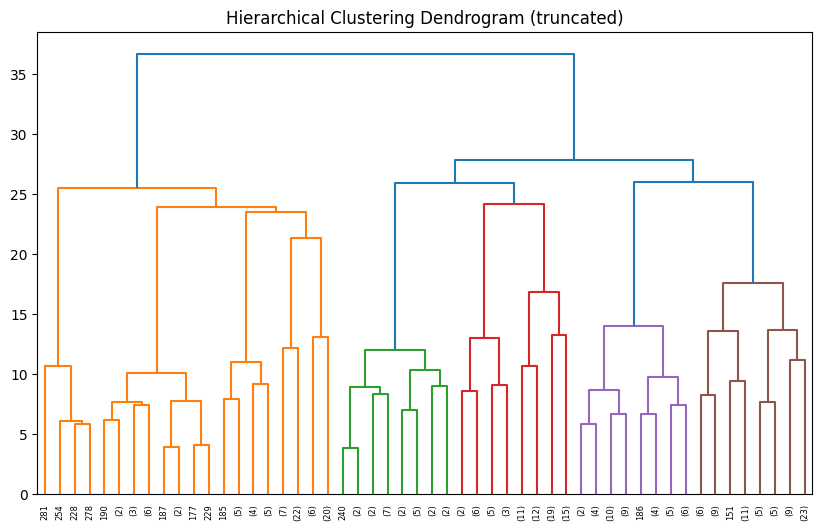

In [1]:
# notebooks/05_unsupervised_learning.py
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv(r'C:\Users\pc\Documents\Basel BME\Programming\Python\SPRINTS Heart Disease Project\python\data\heart_disease_clean.csv')
X = df.drop('target',axis=1)
y = df['target']

sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Elbow for KMeans
inertia = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)
plt.plot(K, inertia, 'o-')
plt.xlabel('k'); plt.ylabel('inertia'); plt.title('Elbow method')
plt.show()

# Fit k=2 (or from elbow)
kmeans = KMeans(n_clusters=2, random_state=42).fit(X_scaled)
print("ARI vs labels:", adjusted_rand_score(y, kmeans.labels_))

# Hierarchical
Z = linkage(X_scaled, method='ward')
plt.figure(figsize=(10,6))
dendrogram(Z, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.show()
